# Validation without RE

In [2]:
email = input("Whats your Email? ").strip()

if "@" in email:
    print("Valid")
else:
    print("Invalid")

Whats your Email? huzi@gmail.com
Valid


works but is broken for just '@' as an input

In [3]:
# adding a new seperator as '.' 
email = input("Whats your Email? ").strip()

if "@" in email and "." in email:
    print("Valid")
else:
    print("Invalid")

Whats your Email? @.
Valid


works but is broken for just '@' and '.' as an input

In [5]:
# splitting the input into username and domain name
email = input("Whats your Email? ").strip()

username, domain = email.split("@")

if (username) and ('.' in domain):
    print("Valid")
else:
    print("Invalid")

Whats your Email? huzi@gmail.
Valid


works but is broken for 'user + domain' and just a '.' as an input

In [6]:
# adding endswith '.com'
email = input("Whats your Email? ").strip()

username, domain = email.split("@")

if (username) and (domain.endswith('.com')):
    print("Valid")
else:
    print("Invalid")

Whats your Email? huzi@.com
Valid


works well but is broken for 'no actual domain name' as an input

# Using re Library

re.search(pattern, string, flags = 0)

In [8]:
import re

email = input("Whats your Email? ").strip()

if re.search("@", email):
    print("Valid")
else:
    print("Invalid")

Whats your Email? huzi@gmail.com
Valid


works but is very similar to the very first code and is broken for just '@' as an input

| Symbol | Use Case |
| :------: | :------- |
| . | any character except a newline |
| * | 0 or more repetitions |
| + | 1 or more repetitions |
| ? | 0 or 1 repetitions |
| {m} | m repetitions |
| {m , n} | m-n repetitions |

In [10]:
import re

email = input("Whats your Email? ").strip()

if re.search(".*@.*", email):
    print("Valid")
else:
    print("Invalid")

Whats your Email? huzi@
Valid


works but is broken to just @ after username

In [12]:
import re

email = input("Whats your Email? ").strip()

if re.search("..*@..*", email):
    print("Valid")
else:
    print("Invalid")

Whats your Email? huzi@gmail
Valid


works almost perfectly but is broken to not using "." in input

### More graphical way of representation:
1. Case One: (Using a single 'dot sign')
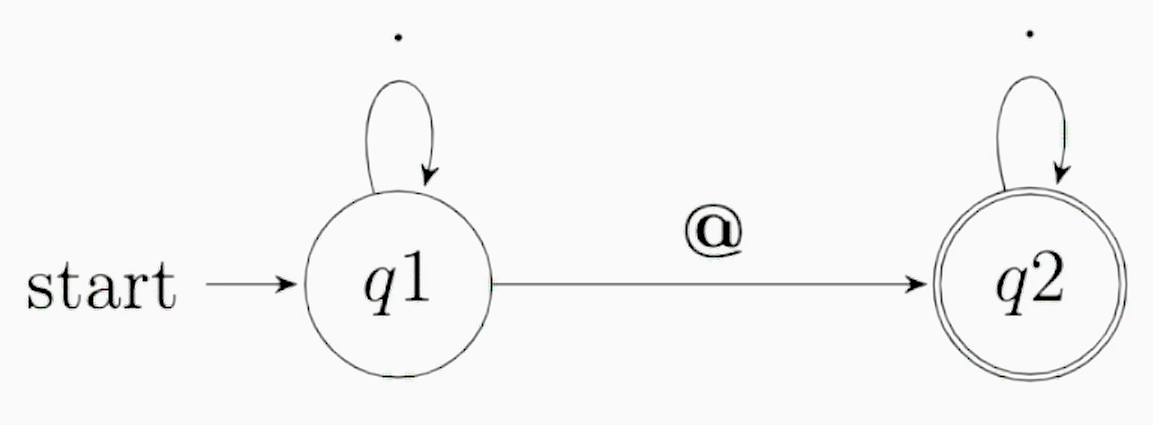

2. Case Two: (Using the double 'dot sign')
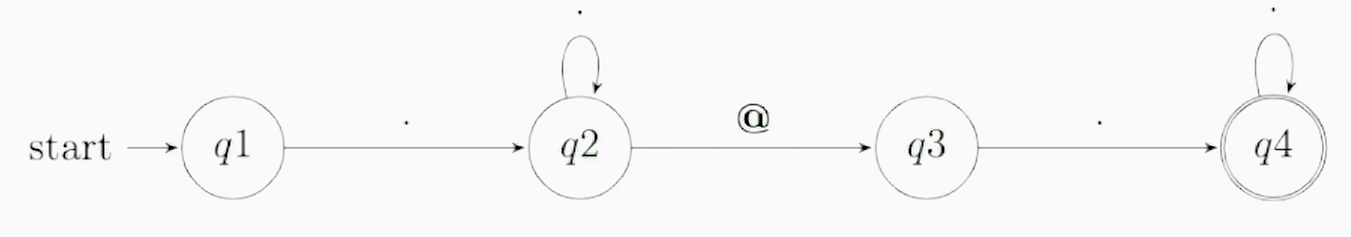

In [11]:
# Code which works similar to the previous one
import re

email = input("Whats your Email? ").strip()

if re.search(".+@.+", email):
    print("Valid")
else:
    print("Invalid")

Whats your Email? huzi@gmail
Valid


works almost perfectly but is broken to not using "." in input

In [16]:
# Solving the issue raised to the previous one
import re

email = input("Whats your Email? ").strip()

if re.search(".+@.+.com", email):
    print("Valid")
else:
    print("Invalid")

Whats your Email? huzi@gmail?com
Valid


works well but accepts any symbol inplace of the '.' symbol

In [17]:
# Adding a backslash to break
import re

email = input("Whats your Email? ").strip()

if re.search(".+@.+\.com", email):
    print("Valid")
else:
    print("Invalid")

Whats your Email? huzi@gmail?com
Invalid


In [24]:
# Making it more clean (by formatting it)
import re

email = input("Whats your Email? ").strip()

if re.search(r".+@.+\.com", email):
    print("Valid")
else:
    print("Invalid")

Whats your Email? My email is huzi@gmail.com .
Valid


It just works almost perfectly but broken to when the input is the literal english sentence
    eg: "My email is huzi@gmail.com ."

# Matching Start and End

| Symbol | Use Case |
| :------: | :------- |
| ^ | matches the start of the string |
| $ | matches the end of the string or just before the newline at the end of the string |

In [23]:
import re

email = input("Whats your Email? ").strip()

if re.search(r"^.+@.+\.com$", email):
    print("Valid")
else:
    print("Invalid")

Whats your Email? My email is huzi@gmail.com .
Invalid


In [25]:
import re

email = input("Whats your Email? ").strip()

if re.search(r"^.+@.+\.com$", email):
    print("Valid")
else:
    print("Invalid")

Whats your Email? huzi@@@@gmail.com
Valid


It just works almost perfectly but broken to when used multiple '@' symbols

# Set of Characters

| Symbol | Use Case |
| :------: | :------- |
| [] | set of characters |
| [^] | complementing the set |

In [26]:
import re

email = input("Whats your Email? ").strip()

if re.search(r"^ [^@] + @ [^@] + \.com $", email):
    print("Valid")
else:
    print("Invalid")

Whats your Email? huzi@@@gmail.com
Invalid


Pattern Matching: (^ [^@] + @ [^@] + \.com $)

What does that mean:
1. ( '^' ) : Match from the start of the string
2. ( '[^@]' ): Can include any characters except the '@' sign
3. ( '+' ) : One or more repetition of the same
4. ( '@' ): A literal '@' symbol
5. ( [^@] ): Same as "Point 2"
6. ( '+' ) : One or more of those things
7. ( " \ " ) : Break the set 
8. ( .com ) : Literally the ".com" should be present in the input
9. ( '$' ): Match at the end fo the string